In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
# 한글설정
plt.rc("font", family="Malgun Gothic") # 윈도우즈
plt.rc("axes", unicode_minus=False) # 축의 - 깨짐 방지

In [9]:
df = pd.read_csv('data/일별평균대기오염도_2022(에어코리아).csv',
                 encoding='cp949')
df.head()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
0,20220101,강남구,0.029,0.014,0.5,0.003,25.0,12.0
1,20220101,홍릉로,0.038,0.009,0.6,0.004,27.0,16.0
2,20220101,행주,0.034,0.012,0.7,0.004,27.0,16.0
3,20220101,항동,0.030,0.011,0.5,0.003,27.0,14.0
4,20220101,한강대로,0.037,0.011,0.6,0.003,34.0,14.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18250 entries, 0 to 18249
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정일시          18250 non-null  int64  
 1   측정소명          18250 non-null  object 
 2   이산화질소농도(ppm)  18172 non-null  float64
 3   오존농도(ppm)     18176 non-null  float64
 4   일산화탄소농도(ppm)  18174 non-null  float64
 5   아황산가스농도(ppm)  18176 non-null  float64
 6   미세먼지농도(㎍/㎥)   18115 non-null  float64
 7   초미세먼지농도(㎍/㎥)  18122 non-null  float64
 8   측정일           18250 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 1.3+ MB


In [11]:
# df['측정일시'] : 20220101 => '2022-01-01' => datetime형으로 형변환(df['측정일'])
df['측정일'] = df['측정일시'].astype(str)
df.head()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥),측정일
0,20220101,강남구,0.029,0.014,0.5,0.003,25.0,12.0,20220101
1,20220101,홍릉로,0.038,0.009,0.6,0.004,27.0,16.0,20220101
2,20220101,행주,0.034,0.012,0.7,0.004,27.0,16.0,20220101
3,20220101,항동,0.030,0.011,0.5,0.003,27.0,14.0,20220101
4,20220101,한강대로,0.037,0.011,0.6,0.003,34.0,14.0,20220101


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18250 entries, 0 to 18249
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정일시          18250 non-null  int64  
 1   측정소명          18250 non-null  object 
 2   이산화질소농도(ppm)  18172 non-null  float64
 3   오존농도(ppm)     18176 non-null  float64
 4   일산화탄소농도(ppm)  18174 non-null  float64
 5   아황산가스농도(ppm)  18176 non-null  float64
 6   미세먼지농도(㎍/㎥)   18115 non-null  float64
 7   초미세먼지농도(㎍/㎥)  18122 non-null  float64
 8   측정일           18250 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 1.3+ MB


In [14]:
df['측정일'] = df['측정일'].str[:4] + "-" + df['측정일'].str[4:6] + "-" + df['측정일'].str[6:]

In [15]:
df[['측정일시', '측정일']]

,측정일시,측정일
0,20220101,2022-01-01
1,20220101,2022-01-01
2,20220101,2022-01-01
3,20220101,2022-01-01
4,20220101,2022-01-01
...,...,...
18245,20221231,2022-12-31
18246,20221231,2022-12-31
18247,20221231,2022-12-31
18248,20221231,2022-12-31


In [16]:
pd.to_datetime(df['측정일'])

0       2022-01-01
1       2022-01-01
2       2022-01-01
3       2022-01-01
4       2022-01-01
           ...    
18245   2022-12-31
18246   2022-12-31
18247   2022-12-31
18248   2022-12-31
18249   2022-12-31
Name: 측정일, Length: 18250, dtype: datetime64[ns]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18250 entries, 0 to 18249
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정일시          18250 non-null  int64  
 1   측정소명          18250 non-null  object 
 2   이산화질소농도(ppm)  18172 non-null  float64
 3   오존농도(ppm)     18176 non-null  float64
 4   일산화탄소농도(ppm)  18174 non-null  float64
 5   아황산가스농도(ppm)  18176 non-null  float64
 6   미세먼지농도(㎍/㎥)   18115 non-null  float64
 7   초미세먼지농도(㎍/㎥)  18122 non-null  float64
 8   측정일           18250 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 1.3+ MB


In [18]:
df.head(1)

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥),측정일
0,20220101,강남구,0.029,0.014,0.5,0.003,25.0,12.0,2022-01-01


In [20]:
# 현재 컬럼 목록
cols = df.columns.tolist()
cols.remove('측정일')
cols

['측정일시',
 '측정소명',
 '이산화질소농도(ppm)',
 '오존농도(ppm)',
 '일산화탄소농도(ppm)',
 '아황산가스농도(ppm)',
 '미세먼지농도(㎍/㎥)',
 '초미세먼지농도(㎍/㎥)']

In [23]:
new_cols = [cols[0], '측정일'] + cols[1:]
df = df[new_cols]
df.head(1)

,측정일시,측정일,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
0,20220101,2022-01-01,강남구,0.029,0.014,0.5,0.003,25.0,12.0


In [35]:
# 서울시 측정소명들
print('측정소명 갯수 : ', df['측정소명'].unique().shape[0])
print(df['측정소명'].unique())

측정소명 갯수 :  50
['강남구' '홍릉로' '행주' '항동' '한강대로' '청계천로' '천호대로' '중랑구' '중구' '종로구' '종로' '정릉로'
 '자연사박물관' '은평구' '용산구' '올림픽공원' '영등포로' '영등포구' '양천구' '신촌로' '시흥대로' '송파구' '세곡'
 '성북구' '성동구' '화랑로' '서초구' '서울숲' '서대문구' '북한산' '마포아트센터' '마포구' '동작대로' '동작구'
 '동대문구' '도산대로' '도봉구' '노원구' '남산' '금천구' '구로구' '광진구' '관악산' '관악구' '공항대로' '강서구'
 '강북구' '강변북로' '강동구' '강남대로']


In [48]:
loc_name = "공항대로"
df_flt = df[df['측정소명']==loc_name]
df_flt.head(2)

,측정일시,측정일,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
44,20220101,2022-01-01,공항대로,0.035,0.010,0.6,0.002,31.0,15.0
93,20220102,2022-01-02,공항대로,0.027,0.017,0.5,0.003,37.0,22.0


In [49]:
print(f'{loc_name} 데이터(df_flt) 개수 : ', len(df_flt))
print(df_flt.info())

공항대로 데이터(df_flt) 개수 :  365
<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 44 to 18249
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정일시          365 non-null    int64  
 1   측정일           365 non-null    object 
 2   측정소명          365 non-null    object 
 3   이산화질소농도(ppm)  365 non-null    float64
 4   오존농도(ppm)     365 non-null    float64
 5   일산화탄소농도(ppm)  365 non-null    float64
 6   아황산가스농도(ppm)  365 non-null    float64
 7   미세먼지농도(㎍/㎥)   365 non-null    float64
 8   초미세먼지농도(㎍/㎥)  365 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 28.5+ KB
None


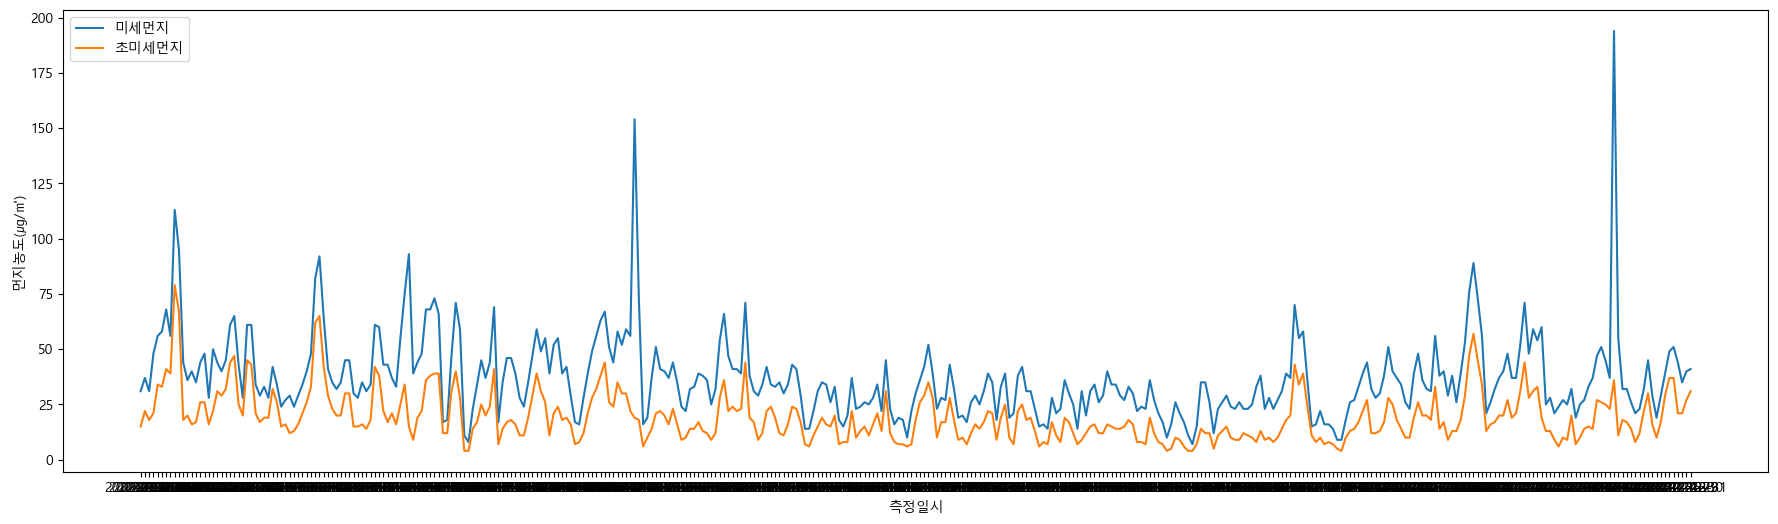

In [53]:
plt.figure(figsize=(22,6))
plt.plot(df_flt['측정일'], df_flt['미세먼지농도(㎍/㎥)'], label='미세먼지')
plt.plot(df_flt['측정일'], df_flt['초미세먼지농도(㎍/㎥)'], label='초미세먼지')
plt.xlabel('측정일시')
plt.ylabel('먼지농도(㎍/㎥)')
plt.legend(loc="upper left")
plt.show()

In [56]:
df_flt2 = df_flt[['측정일', '미세먼지농도(㎍/㎥)']]
ts = df_flt2.set_index('측정일')
ts.head()

,미세먼지농도(㎍/㎥)
측정일,
2022-01-01,31.0
2022-01-02,37.0
2022-01-03,31.0
2022-01-04,48.0
2022-01-05,56.0


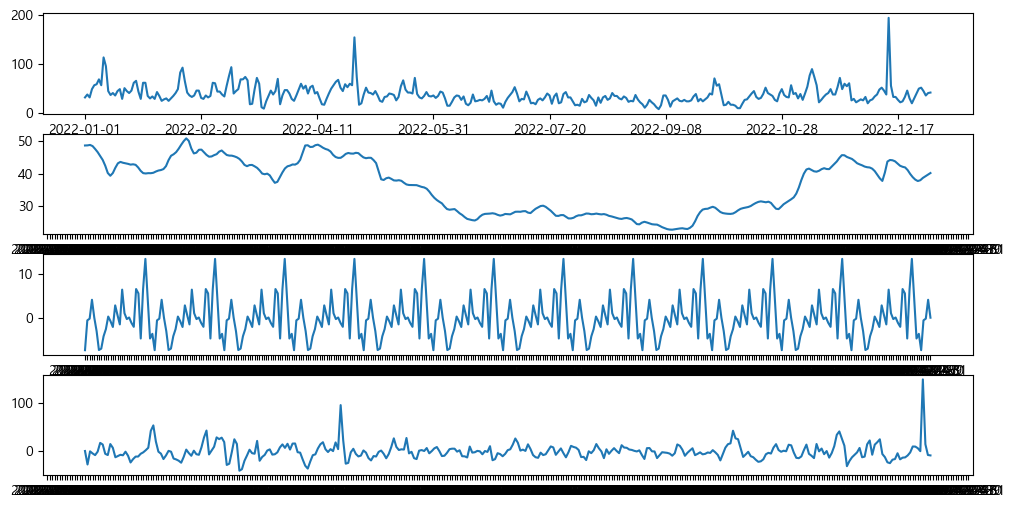

In [64]:
# 시계열 데이터의 구조를 분해해 주는 도구
# 추세()
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ts['미세먼지농도(㎍/㎥)'],
                            model='additive', # 실제값 추세, 계절성, 잔차(오차)를 덧셈으로 분석
                            period=30) # 한 달 단위로 계절성을 분석
# result : 분석 결과
# result.observed : 실제 데이터
# result.trend    : 데이터의 장기적인 변화. 전반적으로 감소/증가
# result.seasonal : 주기적인 계절성 패턴
# result.resid    : 잔차(실제값에서 추세와 계절성을 뺀 노이즈)
fig, axes = plt.subplots(4,1,figsize=(12,6))
# axes[0].plot(result.observed)
result.observed.plot(ax=axes[0])
axes[1].plot(result.trend)
axes[2].plot(result.seasonal)
axes[3].plot(result.resid)
plt.show()

In [65]:
def plot_seasonal_decompose(result):
    fig, axes = plt.subplots(4,1, figsize=(12,6))
    result.observed.plot(ax=axes[0])
    axes[0].set_ylabel('관측값')
    axes[1].plot(result.trend)
    axes[1].set_ylabel('트렌드')
    axes[2].plot(result.seasonal)
    axes[2].set_ylabel('계절성')
    axes[3].plot(result.resid)
    axes[3].set_ylabel('잔차')
    plt.xlabel('날짜')
    plt.tight_layout()
    plt.show()

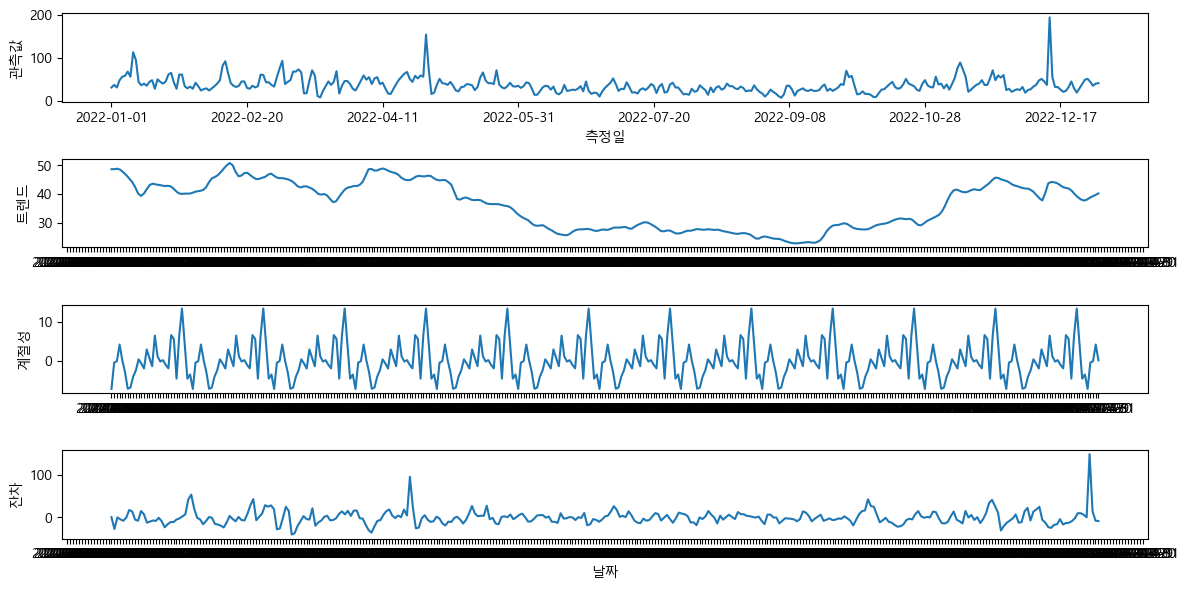

In [66]:
plot_seasonal_decompose(result)

## seasonal_decompose & RNN/LSTM/GRU & Prophet
            통계적 분석                     예측                   예측
## Prophet
- 계절성, 추세, 휴일효과 등을 자동으로 모델링
- pip install prophet

In [67]:
df_flt2.head()

,측정일,미세먼지농도(㎍/㎥)
44,2022-01-01,31.0
93,2022-01-02,37.0
143,2022-01-03,31.0
196,2022-01-04,48.0
244,2022-01-05,56.0


In [68]:
df_flt2.columns = ['ds', 'y'] # prophet의 fit 시 컬럼명을 반드시 ds(날짜),y(타겟변수)로 변경
df_flt2

,ds,y
44,2022-01-01,31.0
93,2022-01-02,37.0
143,2022-01-03,31.0
196,2022-01-04,48.0
244,2022-01-05,56.0
...,...,...
18043,2022-12-27,51.0
18095,2022-12-28,44.0
18143,2022-12-29,35.0
18193,2022-12-30,40.0


In [69]:
from prophet import Prophet
p_model = Prophet()
p_model.fit(df_flt2)

16:49:53 - cmdstanpy - INFO - Chain [1] start processing
16:49:53 - cmdstanpy - INFO - Chain [1] done processing


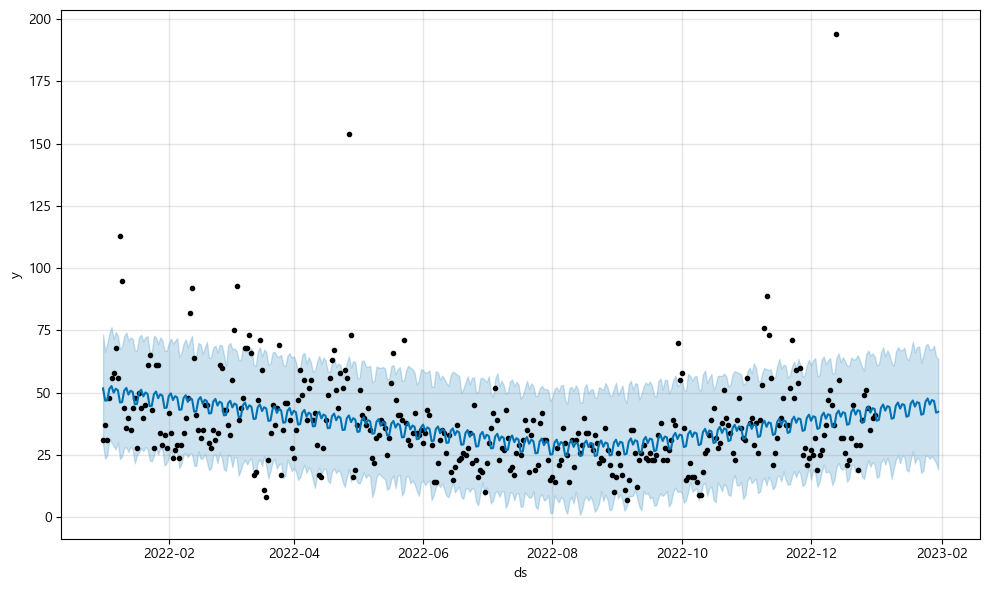

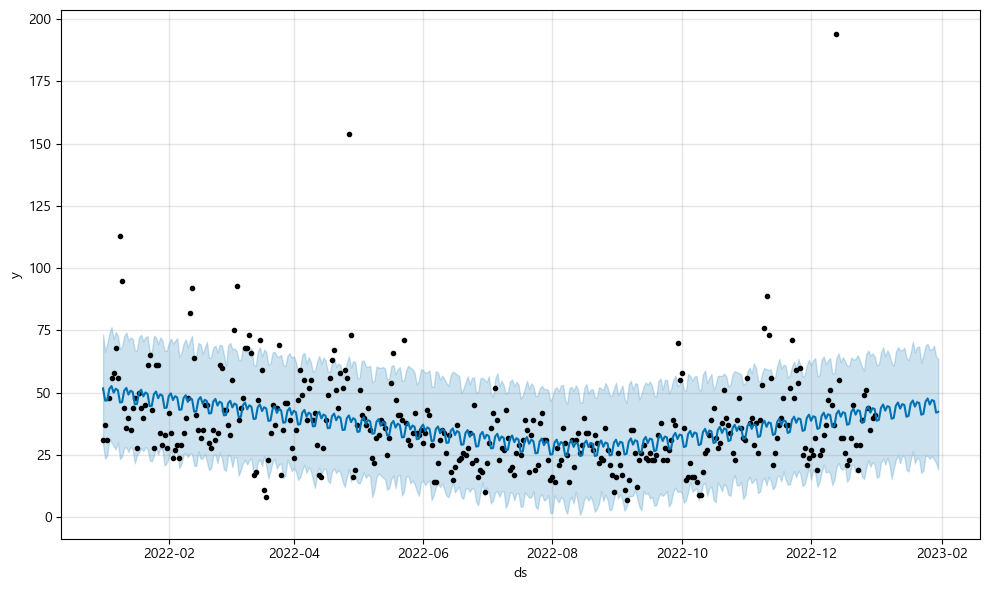

In [76]:
# p_model을 이용해 30일 이후 데이터 예측
future = p_model.make_future_dataframe(periods=30)
forecast = p_model.predict(future)
p_model.plot(forecast)

In [83]:
forecast[['ds','yhat', 'yhat_lower','yhat_upper']].tail(30)

,ds,yhat,yhat_lower,yhat_upper
365,2023-01-01,38.738106,15.875180,60.975128
366,2023-01-02,39.108625,16.357176,61.489610
367,2023-01-03,43.966852,22.024838,66.237873
368,2023-01-04,45.272123,23.560633,68.229189
369,2023-01-05,42.812810,21.149394,64.643904
370,2023-01-06,44.613248,23.906880,67.041434
371,2023-01-07,44.275744,20.999816,65.214715
372,2023-01-08,39.550766,15.483978,62.040706
373,2023-01-09,39.921285,19.520137,60.768935
374,2023-01-10,44.779513,23.068794,66.338858


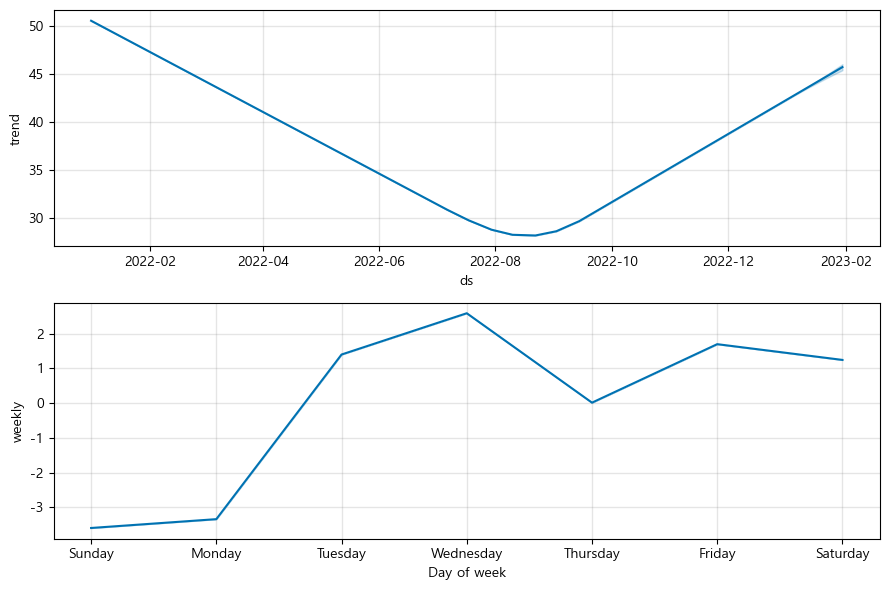

In [84]:
f2 = p_model.plot_components(forecast) # 트렌드와 휴일효과 그래프

In [85]:
forecast.loc[forecast['ds']=='2023-01-16', ['yhat', 'yhat_lower', 'yhat_upper']]

,yhat,yhat_lower,yhat_upper
380,40.733946,18.35527,63.083575
